In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df= pd.read_excel('Preprocessed_data_2.xlsx')

### Objective: **Behavior-Based Segmentation**  
Segment shoppers using variables like **Age**, **Avg Spend Per Visit**, **Shopping Frequency**, **Bulk or Need**, and **Preferred Store** to identify behavior patterns, optimize customer targeting, and improve product offerings.

C:\Users\AMOL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AMOL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AMOL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AMOL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

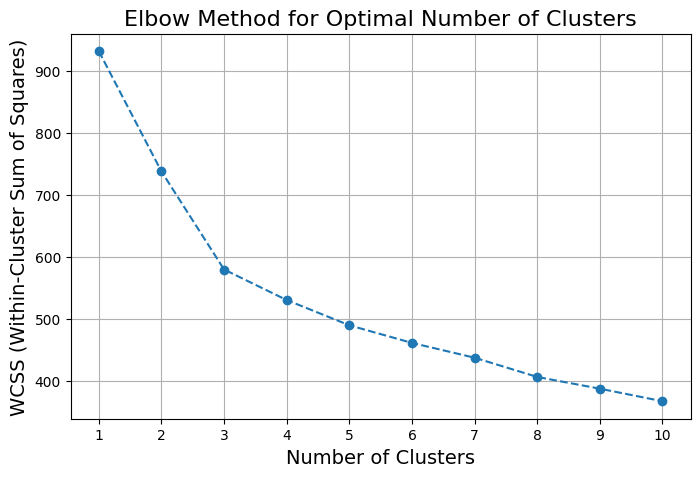

C:\Users\AMOL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


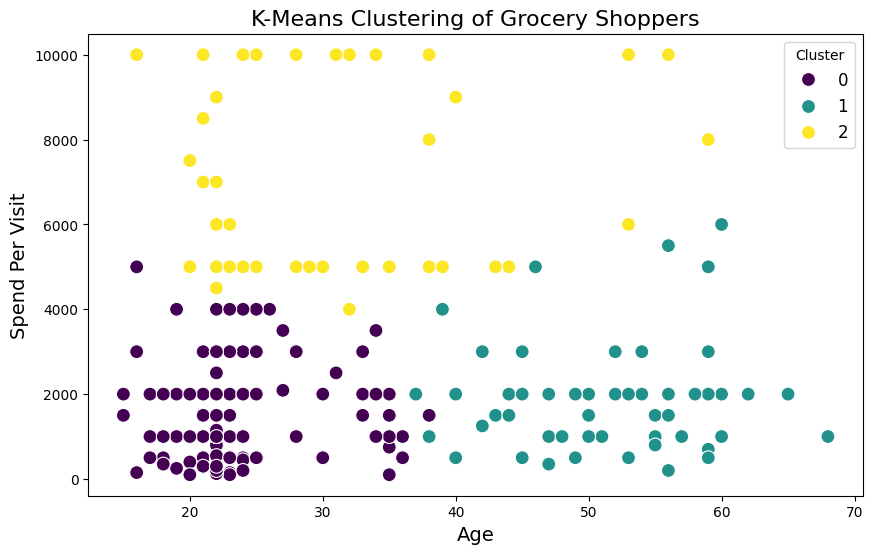

Mean Cluster Profiles:
                Age  Spend_Per_Visit
Cluster                            
0        23.377778      1650.629630
1        51.254237      1923.728814
2        30.560976      7012.317073

Median Cluster Profiles:
           Age  Spend_Per_Visit
Cluster                       
0        22.0           2000.0
1        52.0           2000.0
2        28.0           6000.0


In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for clustering (Keeping 'Preferred_Store' and removing 'Payment_Mode')
features = ['Age', 'Spend_Per_Visit', 'Shopping_Frequency', 'Bulk_or_Need', 'Preferred_Store']
selected_df = df[features].copy()

# Define numerical and categorical features
numerical_features = ['Age', 'Spend_Per_Visit']
categorical_features = ['Shopping_Frequency', 'Bulk_or_Need', 'Preferred_Store']

# Convert categorical columns to string explicitly
selected_df[categorical_features] = selected_df[categorical_features].astype(str)

# Define preprocessing steps
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing
preprocessed_data = preprocessor.fit_transform(selected_df)

# Convert processed data into a DataFrame
processed_df = pd.DataFrame(preprocessed_data, columns=np.hstack([
    numerical_features,
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
]))

# Elbow Chart for Optimal Clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(processed_df)
    wcss.append(kmeans.inertia_)

# Plotting the elbow chart
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Apply K-Means clustering with optimal number of clusters
optimal_clusters = 3  # Adjust based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(processed_df)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spend_Per_Visit', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Grocery Shoppers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spend Per Visit', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.show()

# Cluster Profiles Analysis (Mean & Median)
mean_profiles = df.groupby('Cluster')[numerical_features].mean()
median_profiles = df.groupby('Cluster')[numerical_features].median()

print("Mean Cluster Profiles:\n", mean_profiles)
print("\nMedian Cluster Profiles:\n", median_profiles)


1. **Cluster 0**:  
   - Likely includes **younger shoppers** or individuals who have a **lower average spend per visit**.  
   - These customers may shop more frequently for **needs rather than bulk**, indicating they prefer smaller, more regular purchases.  
   - They might prefer **convenience stores** or budget-friendly store options that cater to everyday essentials.

2. **Cluster 1**:  
   - Represents a **balanced age group** with **moderate spending per visit**.  
   - Their shopping frequency suggests a mix of **regular shoppers** or those buying both for **need and bulk purposes**.  
   - Preferred stores could be a mix of mid-range or popular chain stores offering good value for money.

3. **Cluster 2**:  
   - Likely includes **older or higher-income shoppers** who have a **higher average spend per visit**.  
   - This group might shop **less frequently**, focusing on **bulk purchases** or premium products.  
   - They are likely loyal to **premium or specialty stores**, making them ideal candidates for personalized marketing strategies.



These four individuals stand out due to **high income**, **bulk purchasing**, and **government employment**, 
leading to **predictable spending habits** and **large purchases at supermarkets or wholesale stores**. 